## Business Understanding

In this project, as may be already seen, we're going to build a ML model that can predict house price.

The most important thing when talking about house price is the location. For this project, we will have a dataset providing house price info in King County, USA. Therefore, our price range will only stay in this location. Furthermore, this dataset only contains the home sale from May 2014 to May 2015.

There are bunch of factors to consider while estimating house price in reality. However, some of them make crucial impact. For simplicity, we'll only use these features to train our model: bedrooms, bathrooms, floors, waterfront, condition, grade, square foot lot, square foot living, square foot basement, price.

## About the dataset

This dataset was acquired from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

## Import prerequisites libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
df = pd.read_csv("./dataset/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data preprocessing

In [5]:
# Extract features
factors = ["bedrooms", "bathrooms", "floors", "waterfront", "condition", "grade", "sqft_living15", "sqft_lot15", "sqft_basement", "price"]
df1 = df[factors]
df1.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
0,3,1.00,1.0,0,3,7,1340,5650,0,221900.0
1,3,2.25,2.0,0,3,7,1690,7639,400,538000.0
2,2,1.00,1.0,0,3,6,2720,8062,0,180000.0
3,4,3.00,1.0,0,5,7,1360,5000,910,604000.0
4,3,2.00,1.0,0,3,8,1800,7503,0,510000.0


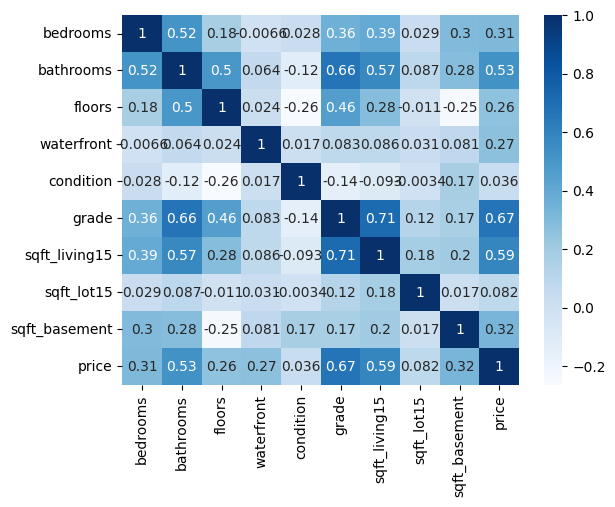

In [6]:
# Check the correlation
# Based on reality and our total features in this dataset, these selected features should be the fundamentals to be considered.
# However, from the matrix, it seems that they have literally no correlation. The highest result comes from grade
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

In [7]:
# Check null values
df1.isnull().sum()

bedrooms         0
bathrooms        0
floors           0
waterfront       0
condition        0
grade            0
sqft_living15    0
sqft_lot15       0
sqft_basement    0
price            0
dtype: int64

In [8]:
# Check duplicates
df1[df1.duplicated]

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
3951,4,1.75,2.0,0,4,8,2520,14789,350,550000.0
4352,2,2.00,2.0,0,3,9,1070,928,350,259950.0
10607,6,4.50,2.0,0,3,8,2470,7561,0,510000.0
11121,3,2.50,3.0,0,3,8,1330,1113,0,375000.0
11408,3,2.50,3.0,0,3,8,1740,1280,0,568000.0
14084,3,2.00,1.0,0,3,7,2060,67756,0,450000.0
14983,3,2.50,2.0,0,3,9,2290,7984,0,585000.0
15895,6,4.50,2.0,0,3,8,2470,7561,0,510000.0
16380,3,2.50,2.0,0,3,9,1610,1618,560,629950.0
16608,2,1.00,1.0,0,5,6,1220,1740,0,245000.0


In [9]:
df2 = df1[~df1.duplicated()]
df2.shape

(21592, 10)

In [10]:
# Check format
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21592 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21592 non-null  int64  
 1   bathrooms      21592 non-null  float64
 2   floors         21592 non-null  float64
 3   waterfront     21592 non-null  int64  
 4   condition      21592 non-null  int64  
 5   grade          21592 non-null  int64  
 6   sqft_living15  21592 non-null  int64  
 7   sqft_lot15     21592 non-null  int64  
 8   sqft_basement  21592 non-null  int64  
 9   price          21592 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.8 MB


In [11]:
# Check outliers
df2.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
count,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,2.159200e+04
mean,3.370878,2.114475,1.493609,0.007549,3.409642,7.656586,1986.736708,12774.547564,291.706419,5.401477e+05
std,0.929849,0.770032,0.539472,0.086559,0.650837,1.175739,685.507329,27313.198749,442.715355,3.672718e+05
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,399.000000,651.000000,0.000000,7.500000e+04
25%,3.000000,1.750000,1.000000,0.000000,3.000000,7.000000,1490.000000,5100.000000,0.000000,3.215000e+05
50%,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,1840.000000,7620.000000,0.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,2360.000000,10087.000000,560.000000,6.450000e+05
max,33.000000,8.000000,3.500000,1.000000,5.000000,13.000000,6210.000000,871200.000000,4820.000000,7.700000e+06


In [12]:
# no. bedrooms and bathrooms cannot be 0
df2[df2.bedrooms==0]

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
875,0,0.00,3.5,0,3,7,2360,4000,0,1095000.0
3119,0,0.00,3.0,0,3,8,1470,1399,0,380000.0
3467,0,1.50,3.0,0,3,7,1430,1650,0,288000.0
4868,0,1.00,1.0,0,2,4,2170,6000,0,228000.0
6994,0,0.00,2.0,0,3,12,4740,35061,0,1295650.0
8477,0,2.50,2.0,0,3,8,2500,8751,0,339950.0
8484,0,2.50,2.0,0,3,7,1810,5685,0,240000.0
9773,0,0.00,2.0,0,3,8,2520,8050,0,355000.0
9854,0,0.00,2.0,0,3,7,1060,7200,0,235000.0
12653,0,2.50,2.0,0,3,7,1500,4675,0,320000.0


In [13]:
df3 = df2[~((df2.bedrooms==0) | (df2.bathrooms==0))]
df3.shape

(21576, 10)

In [14]:
from scipy.stats import norm

def plot_distribution(feature, df, ax=plt):
    data = df[feature]
    mean = data.mean()
    median = data.median()
    std = data.std()
    mad = data.sub(median).abs().median()
    max_values = data.max()
    min_values = data.min()
    
    # Plot the histogram
    # sns.histplot(data=data, bins=30, density=True, alpha=0.5, ax=ax)
    ax.hist(data, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

    # Plot the line to show distribution
    x = np.linspace(max_values, min_values, 100)
    y = norm.pdf(x, mean, std)
    ax.plot(x, y, color='orange')

    # Plot mean and median vertical line
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')

    ax.set_xlabel(feature)

    ax.legend()

In [15]:
def plot_all_distributions(df):
    fig, axes = plt.subplots(4, 3, figsize=(20, 10))
    axes = axes.flatten()
    for i, feature in zip(range(len(df.columns)), df.columns):
        plot_distribution(feature, df, axes[i])
    plt.tight_layout()

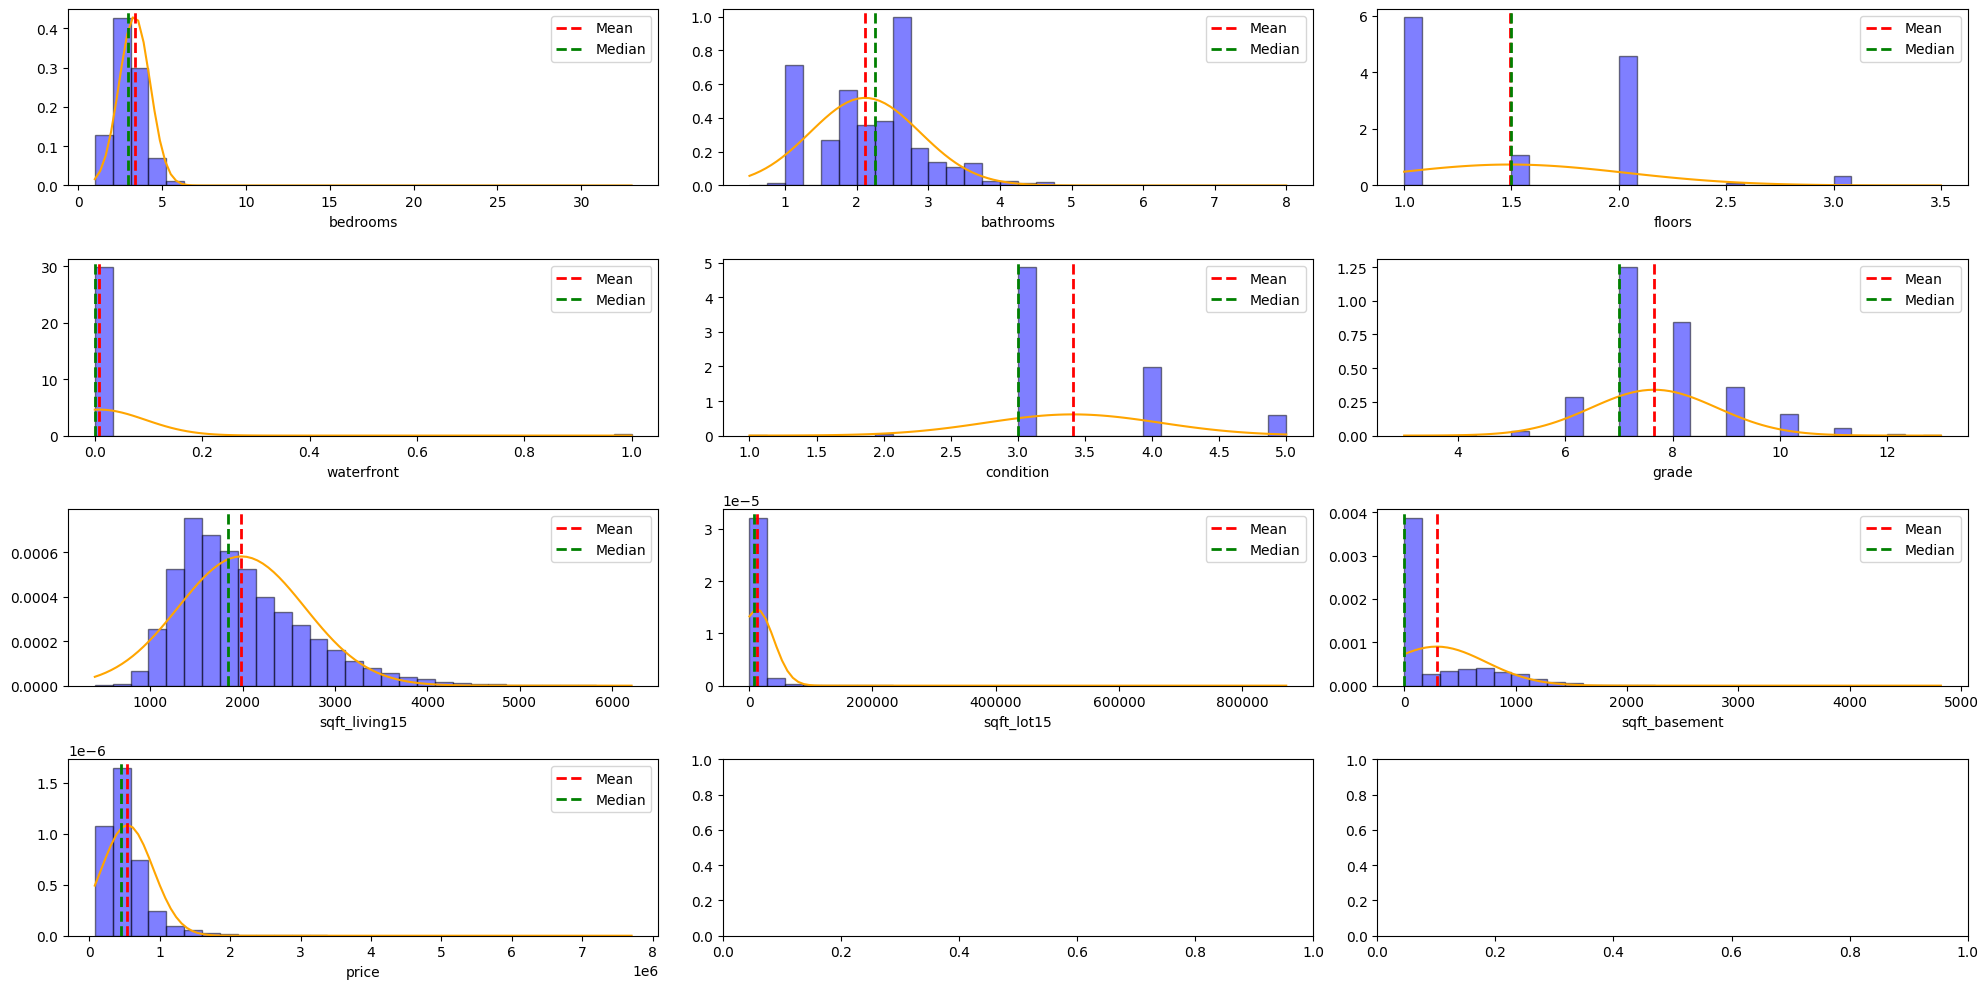

In [16]:
plot_all_distributions(df3)

In [17]:
# Now we're going to remove outliers by using standard deviation
# Any data points that stay out of this range (mean-3*std) <= values <= (mean+3*std) are considered outliers
# As for floors, waterfront and condition, we can accept the max value. Therefore, there are no outliers in these 3 features
def outlier_removal(df):
    features = ["bedrooms", "bathrooms", "sqft_living15", "sqft_lot15", "sqft_basement", "price"]
    for feature in features:
        data = df[feature]
        # mean = data.mean()
        # std = data.std()

        # df = df[(data >= (mean-3*std)) & (data <= (mean+3*std))]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(data >= lower_bound) & (data <= upper_bound)]

    df_out = df.copy()
    return df_out

In [18]:
df4 = outlier_removal(df3)
df4.shape

(17329, 10)

In [19]:
df4.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
count,17329.000000,17329.000000,17329.000000,17329.000000,17329.000000,17329.000000,17329.000000,17329.000000,17329.000000,1.732900e+04
mean,3.266721,1.986713,1.470396,0.001500,3.405563,7.427318,1833.044723,7070.325293,237.618558,4.526706e+05
std,0.777587,0.658010,0.542451,0.038707,0.646734,0.930364,537.894678,3091.000216,357.624384,1.890099e+05
min,2.000000,0.750000,1.000000,0.000000,1.000000,4.000000,620.000000,651.000000,0.000000,7.800000e+04
25%,3.000000,1.500000,1.000000,0.000000,3.000000,7.000000,1440.000000,4950.000000,0.000000,3.050000e+05
50%,3.000000,2.000000,1.000000,0.000000,3.000000,7.000000,1730.000000,7201.000000,0.000000,4.200000e+05
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,2150.000000,8906.000000,480.000000,5.690000e+05
max,5.000000,3.500000,3.500000,1.000000,5.000000,11.000000,3600.000000,17136.000000,1320.000000,1.010000e+06


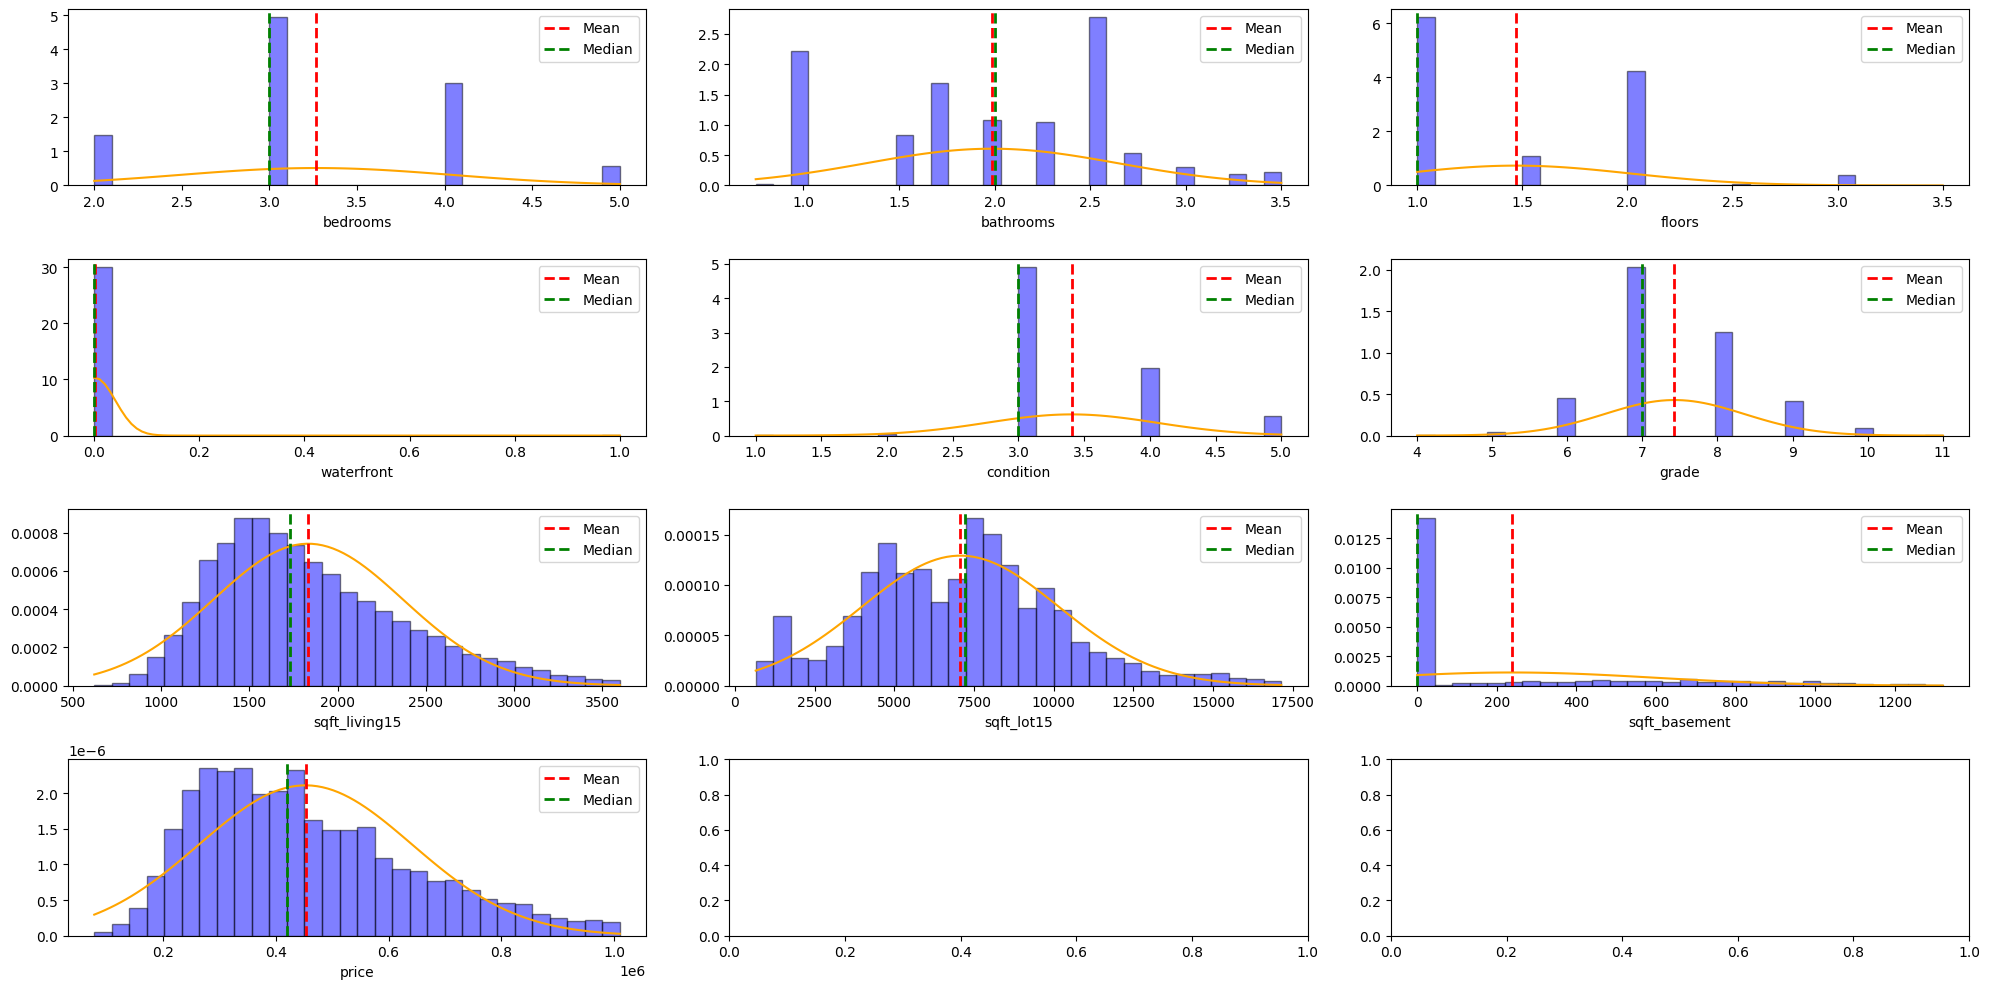

In [20]:
plot_all_distributions(df4)

In [21]:
# Because there are still outliers, we will continue to perform outlier removal
# This time, we will have different numbers for each feature
def specific_outlier_removal(df):
    for feature in ["sqft_lot15", "price"]:
        data = df[feature]
        mean = data.mean()
        std = data.std()

        if feature == "price":
            df = df[(data >= (mean-1.5*std)) & (data <= (mean+std))]
        else:
            df = df[(data >= (mean-0.8*std)) & (data <= (mean+0.25*std))]
    df_out = df.copy()
    return df_out

In [22]:
df5 = specific_outlier_removal(df4)
df5.shape

(5538, 10)

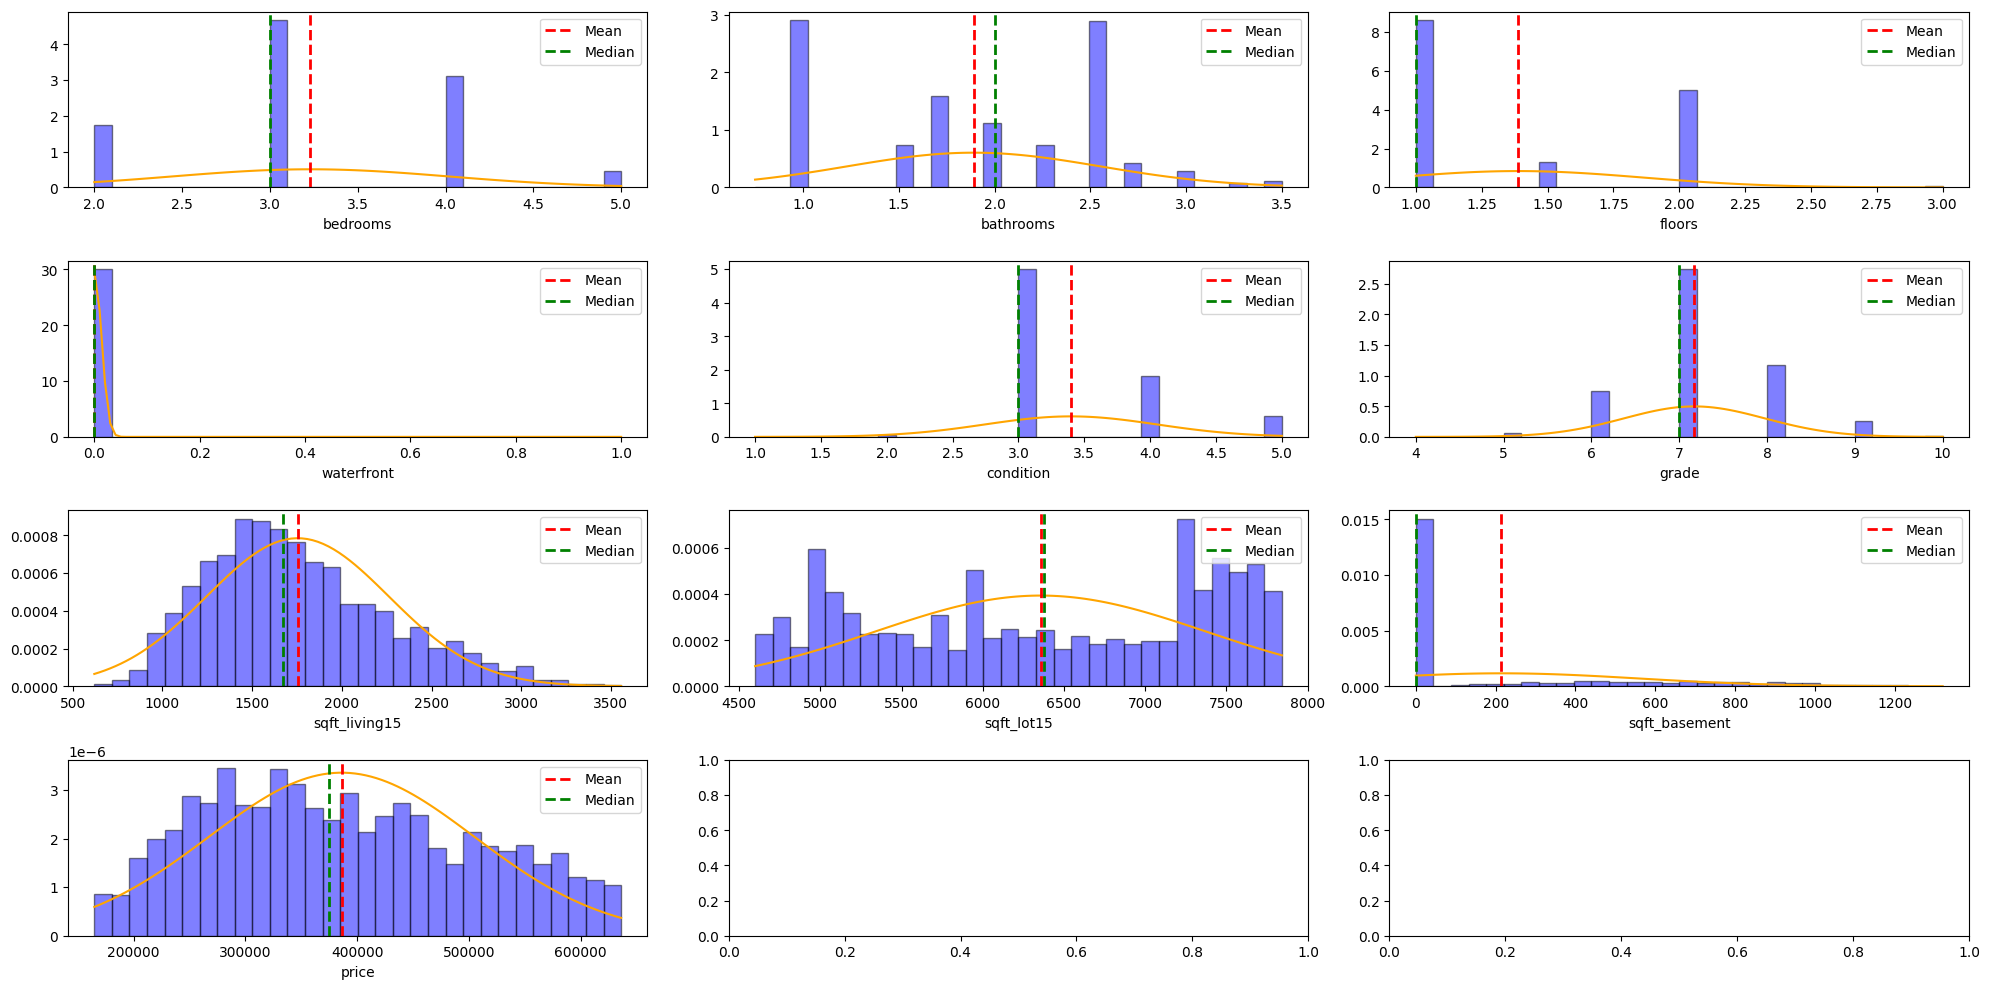

In [23]:
plot_all_distributions(df5)

In [24]:
df5.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living15,sqft_lot15,sqft_basement,price
count,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000
mean,3.230589,1.891387,1.387595,0.000181,3.398339,7.172445,1753.633261,6356.184363,214.188877,386112.407548
std,0.786666,0.661077,0.473856,0.013438,0.653309,0.803001,508.541245,1013.739967,342.231449,118864.150741
min,2.000000,0.750000,1.000000,0.000000,1.000000,4.000000,620.000000,4598.000000,0.000000,164808.000000
25%,3.000000,1.000000,1.000000,0.000000,3.000000,7.000000,1380.000000,5395.000000,0.000000,289000.000000
50%,3.000000,2.000000,1.000000,0.000000,3.000000,7.000000,1670.000000,6378.500000,0.000000,374925.000000
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,2060.000000,7338.750000,420.000000,475375.000000
max,5.000000,3.500000,3.000000,1.000000,5.000000,10.000000,3557.000000,7842.000000,1320.000000,636230.000000


In [51]:
df5 = df5.rename(columns={'sqft_living15': 'sqft_living', 'sqft_lot15': 'sqft_lot'})
df5.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_living,sqft_lot,sqft_basement,price
0,3,1.00,1.0,0,3,7,1340,5650,0,221900.0
1,3,2.25,2.0,0,3,7,1690,7639,400,538000.0
3,4,3.00,1.0,0,5,7,1360,5000,910,604000.0
4,3,2.00,1.0,0,3,8,1800,7503,0,510000.0
6,3,2.25,2.0,0,3,7,2238,6819,0,257500.0


## Model Building

In [52]:
X = df5.drop("price", axis=1)
y = df5.price

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
# We'll perform hyperparamter tuning in order to filter out the best model with best parameters
# At first, we're gonna decide what model to use by testing some models that usually perform well on regression problems
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# We'll also create pipelines for both data transforming and prediction at a time
# When training, our training data will be scaled and then fit into our model
# New inputs coming in will also be scaled, after that our model will predict the price based on those provided inputs
models = {
    'ridge': {
        'pipeline': Pipeline([('scaler', StandardScaler()), ('estimator', Ridge(random_state=10))]),
        'param_grid': {}
    },
    'lasso': {
        'pipeline': Pipeline([('scaler', StandardScaler()), ('estimator', Lasso(random_state=10))]),
        'param_grid': {}
    },
    'forest': {
        'pipeline' : Pipeline([('scaler', StandardScaler()), ('estimator', RandomForestRegressor(random_state=10))]),
        'param_grid': {}
    },
    'gbr': {
        'pipeline' : Pipeline([('scaler', StandardScaler()), ('estimator', GradientBoostingRegressor(random_state=10))]),
        'param_grid': {}
    },
    'svm': {
        'pipeline': Pipeline([('scaler', StandardScaler()), ('estimator', SVR())]),
        'param_grid': {}
    },
}

scoring = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
scores = []

for name, attrs in models.items():
    gscv = GridSearchCV(attrs['pipeline'], attrs['param_grid'], cv=5, scoring=scoring)
    gscv.fit(X_train, y_train)
    scores.append({
        'model': name,
        'RMSE': gscv.best_score_
    })
        
score_df = pd.DataFrame(data=scores)
score_df

,model,RMSE
0,ridge,-101453.354522
1,lasso,-101453.445566
2,forest,-100511.329781
3,gbr,-97950.600814
4,svm,-119026.968736


In [37]:
# As Gradient Boosting gave us the least error, we're now going to choose the best parameters
param_grid = {
    'estimator__n_estimators': [100, 170],
    'estimator__max_depth': [3, 6],
    'estimator__max_features': ['sqrt', 'log2'],
}
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', GradientBoostingRegressor(random_state=10))])

gs = GridSearchCV(pipeline, param_grid, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_score_
best_params = gs.best_params_

print(f"Score: {best_score}")
print(f"Params: {best_params}")

Score: 0.31961853211810803
Params: {'estimator__max_depth': 6, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 100}


In [54]:
model = Pipeline([('scaler', StandardScaler()), ('estimator', GradientBoostingRegressor(n_estimators=170, max_depth=6, max_features='sqrt', random_state=10))])
model.fit(X_train, y_train)

cv_score = model.score(X_test, y_test)
rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

print(f"Prediction accuracy on unseen data: {cv_score}")
print(f"RMSE: {rmse}")

Prediction accuracy on unseen data: 0.35098501420474837
RMSE: 97699.7160502228


## Model deployment

In [55]:
import json

with open('../server/artifacts/columns.json', 'w') as file:
    json.dump(X.columns.tolist(), file)

In [56]:
import joblib

with open('../server/artifacts/gbr.pkl', 'wb') as file:
    joblib.dump(model, file)